## Intro to Regression Models with Neural Networks



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow.python.tools'

In [5]:
# Create data to view and fit

#features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

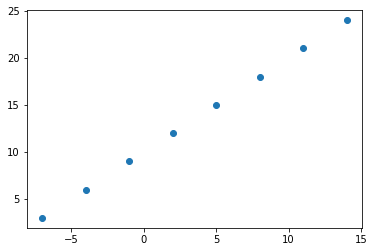

In [6]:
# Visualize it

plt.scatter(X, y);

In [7]:
 y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
# Transform into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling with TF

**1. Creating a model** - define the input (X) amd output layers (y), as well as the hidden layers of a deep learning model

**2. Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluaton metrics (what we canuse to interpret the performance of our model).

**3. Fitting the model** - letting the model try to find patterns between X and y. (feature and labels)

In [9]:
# Set Random Seed
tf.random.set_seed(42)

# 1.Create a  model using the Sequential API 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #mae is short for sochastic medial descent
              metrics=["mae"]) # "mae" - same as writing the function tf.keras....

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 904ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 31ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[12.716021]], dtype=float32)

## we got a prediction which is ~11 off --> exactly as much our mae gives at epoch 5

## Improving our model 

We can improve the previous model by altering some of the steps we took to create a model:

**1. Creating a model** - we might increase the number of hidden units (aka neurons) within each hidden layers, change the activation function of each leayer.

**2. Compiling the model** - we might change the optimiation function or perhaps the **learning rate** of the optimization function.

**3. Fitting the model** - fit a model with more epochs or with more data.


In [12]:
# Rebuid our model

# 1.Create a  model using the Sequential API 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #mae is short for sochastic medial descent
              metrics=["mae"]) # "mae" - same as writing the function tf.keras....

# 3. Fit the model (it will train longer than the previous one)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 857ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================]

In [13]:
# Predict new model: 

# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[29.739855]], dtype=float32)

## Correct number should have been 27. We can see that it improved from a difference of ~11 (first model) to ~2 :D



In [14]:
# Model improved again (#3)

# 1.Create a  model using the Sequential API (this time we add an extra layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model 
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"]) 

# 3. Fit the model (it will train longer than the previous one)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 716ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 20ms/ste

In [15]:
# Predict new model: 

# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 176ms/step


array([[31.223137]], dtype=float32)

## Correct number should have been 27. We can see that there is a difference of ~4, and not of ~2, hiow much the other model had...thus this model is performing worse than the previous one, even though it has a smaller mae

In [16]:
# Model improved again (#4)

# 1.Create a  model using the Sequential API 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model (we change the optimizer to Adam optimization algorithm - a better SGD)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01), 
              metrics=["mae"]) 

# 3. Fit the model (it will train longer than the previous one)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 19ms/ste

In [17]:
# Predict new model: 

# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 182ms/step


array([[26.43606]], dtype=float32)

## Big Bizniss - We have a differnce of ~0.5 between prediction and real value :D 

In [18]:
# The 3 sets:

X = tf.range(-100, 100, 4)
y = X + 10

X, len(X), y, len(y)


(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 50,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 50)

In [19]:
# Training set (80%) and testing (20%)

X_train = X[:40] # 80%
X_test = X[40:] # 20% 

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

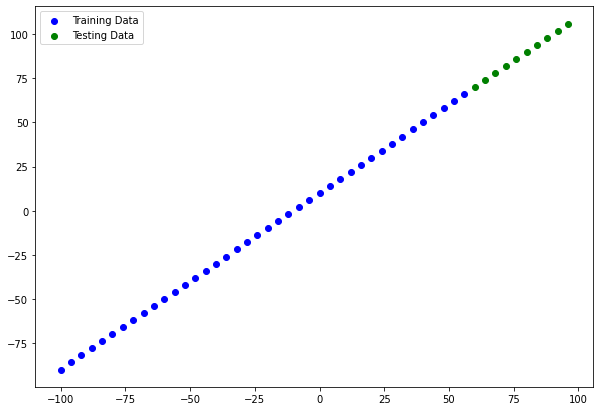

In [20]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plot training data in blue:

plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot test data in green:

plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show a legend:
plt.legend();

In [21]:
# Let's build a neural network for our data:

# 1. create the model:
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1)
])  # for each X value we have a coresponding y value thus the layer.Dense is 1 

# 2. Compile the model:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# # 3. Fit the model --> only on the training data
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


In [22]:
model.summary()

ValueError: ignored

In [ ]:
#  Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # X[0], y[0] are scalar, so the shape is 1
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# Compile

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
 model.summary()

## Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
# Let's fit the model to the training data:

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) #verbose means prnt the number of epochs :D


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing the predictions
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.



In [ ]:
# Make predictions
y_pred = model.predict(X_test)

y_pred

In [ ]:
 y_test

In [ ]:
# Plotting Function:

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

**Mean absolute error (MAE)** - the mean difference between each of the predictions.

**Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.



In [ ]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test);

In [ ]:
# Calculate the mean absolute error 

mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

In [ ]:
# Check the test label tensor values
y_test

In [ ]:
# Check the tensor shapes

y_test.shape, y_pred.shape

In [ ]:
# Shape before squeeze()
y_pred.shape

In [ ]:
# Shape after squeeze()
y_pred.squeeze().shape

In [ ]:
# What do they look like?
y_test, y_pred.squeeze()

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze())
mse

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

**Get more data** - get more examples for your model to train on (more opportunities to learn patterns).

**Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.

**Train for longer** - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.
Build model_1

## Model_1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

## Model_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

## Model_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

## Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

djd

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

From our experiments, it looks like model_2 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.


In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

## Loading a model

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

## Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

Right click on the file in the files pane and click 'download'.
Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

## A larger example


Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [ ]:
# Check out the insurance dataset
insurance.head()


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

In [ ]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View features
X.head()

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

ValueError: ignored

In [24]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

ValueError: ignored

In [25]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

NameError: ignored

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

In [26]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

ValueError: ignored

In [27]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

ValueError: ignored

In [28]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

NameError: ignored

Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [30]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
OneHotEncoder - one hot encode the non-numerical columns.

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

NameError: ignored

In [33]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

AttributeError: ignored

In [34]:
# Normalized and one-hot encoded example
X_train_normal[0]

NameError: ignored

In [35]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

NameError: ignored

In [36]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

NameError: ignored

In [37]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

NameError: ignored

In [38]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

NameError: ignored

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.